# Feed Forward Neural Network for Regression

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [ ]:
# Other imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

For this NB, we will be using Synthetic data i.e. we will not be using a built-in dataset, instead we are going to create it.

In [ ]:
# uniformly distributed points between (-3, +3)
a = np.random.random((5,2)) * 6 - 3
print(a)
print()
print(np.min(a))
print(np.max(a))

[[-2.73569507 -1.88120087]
 [ 2.80014518  0.14518169]
 [-1.66972217 -1.36718786]
 [ 1.79194904 -0.55478581]
 [ 0.69015606  0.38081251]]

-2.7356950699684974
2.8001451767086216


In [ ]:
# Make the dataset

N = 1000
X = np.random.random((N,2)) * 6 - 3 

Y = np.cos(2*X[:,0] + np.cos(3*X[:,1]))

In [ ]:
X

array([[-0.27546956,  2.28091019],
       [ 0.43929799, -2.40138329],
       [-0.55574268,  2.47988512],
       ...,
       [ 0.27258298,  0.99662237],
       [ 0.67366182, -0.34269152],
       [ 0.30715426,  0.95768796]])

In [ ]:
Y[:10]

array([ 0.95634817,  0.0870376 ,  0.75907059, -0.97373379, -0.52085278,
       -0.97575033,  0.52882327, -0.99570758,  0.91735884, -0.68300341])

y = cos(2x1) + cos(3x2)

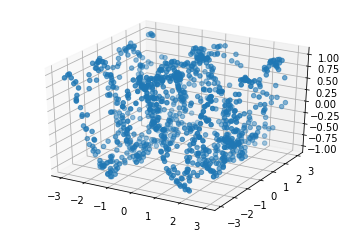

In [ ]:
# Plot it on a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

The data is in the form NxD, where D=2, there is no need of any preprocessing to be done.

All we need is two Dense layers and you can add Regularization if you like, but I chose not to.

In [ ]:
# Build the model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
                                    tf.keras.layers.Dense(1)
])

In [ ]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)

model.compile(optimizer=opt, loss='mse')

r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 3s 3ms/step - loss: 0.5427
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4813
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4745
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4642
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4458
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3930
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3578
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3165
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2769
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3035
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2591
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2389
Epoch 13/100
32/32 [=================

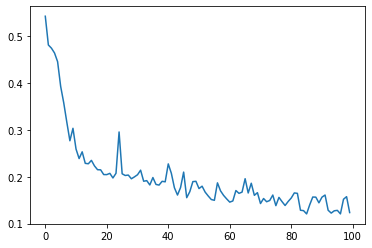

In [ ]:
# Plot the loss

plt.plot(r.history['loss'], label='loss')
plt.show()

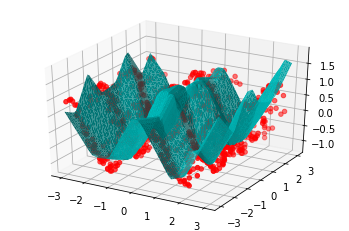

In [ ]:
# Plot the prediction surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, color='r')

# surface plot
line = np.linspace(-3, 3, 50)

xx, yy = np.meshgrid(line, line)

Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, color='c')
plt.show()

Therefore, we see that the Neural Network manages to approximate this function quite well.

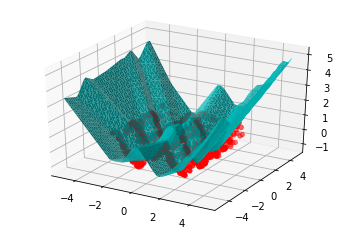

In [ ]:
# Can the NN extrapolate? Lets try to predict it

# Plot the prediction surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, color='r')

# surface plot
line = np.linspace(-5, 5, 50)

xx, yy = np.meshgrid(line, line)

Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, color='c')
plt.show()

Observation: It doesnt qork well. It assumes that the pattern keeps going in the direction it was going at the edges. Anf ofcourse, this is because the NN doesnt use a periodic activation function. therefore, we dont expect it to be periodic wrt the inputs.

# Happy Learning